<a href="https://colab.research.google.com/github/user1855/DMC_courses/blob/main/PEA/Unsupervised%20Methods/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning no Supervisado

## Aplicación de Reducción Dimensional en la Visualización del Clustering

---

In [ ]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

# para componentes principales
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# visualization
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1. Tomar el dataset y reducir a 2 componentes principales.

In [ ]:
# Cargamos los datos con pandas.
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Eliminamos las variables "GENRE" y "CustomerID", dado que no aportan a la clusterización. 

La variable "CustomerID" tiene una clasificación igual a la cantidad de observaciones (200).

La variable "GENRE", es una variable cualitativa, para ello podemos convertir a una variable Dummy para que tome el valor de 0 o 1. Sin embargo, le generará ruido al agrupamiento debido a que las distancias euclidianas se calculan en base a variables cuantitativas. 



In [ ]:
df = df.drop(columns = ['Genre','CustomerID'])
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# 1.1 Estandarización de los datos de cada variable.

In [ ]:
scaler = StandardScaler()
estandarizar = scaler.fit_transform(df)
estandarizar = pd.DataFrame(estandarizar,columns=list(df.columns))
estandarizar.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
5,-1.209269,-1.662660,1.001596
6,-0.276302,-1.624491,-1.715913
7,-1.137502,-1.624491,1.700384
8,1.804932,-1.586321,-1.832378
9,-0.635135,-1.586321,0.846310


# 1.2 Obtención de los componentes principales

In [ ]:
# Paso 3: Reducimos el dataset a 2 componentes principales
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(estandarizar)

PCA(n_components=2)

In [ ]:
# Obtenemos los eigenvectores y eigenvalores
print(sklearn_pca.components_) # eigenvectores
print(sklearn_pca.explained_variance_) # eigenvalores

[[ 0.70638235 -0.04802398 -0.70619946]
 [ 0.03014116  0.9988316  -0.03777499]]
[1.33465831 1.00427272]


In [ ]:
# Obtenemos la varianza explicada por cada componente prinicpal
sklearn_pca.explained_variance_ratio_

array([0.44266167, 0.33308378])

In [ ]:
# Los 2 componentes principales explican el 77.5% de la varianza total.
np.cumsum(sklearn_pca.explained_variance_ratio_)

array([0.44266167, 0.77574546])

# 1.3 Obtener la matriz de proyección a partir de 2 componentes principales

In [ ]:

loadings = sklearn_pca.components_
num_pc = sklearn_pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2
variable,,
Age,0.706382,0.030141
Annual Income (k$),-0.048024,0.998832
Spending Score (1-100),-0.706199,-0.037775


In [ ]:
# Combinación lineal de cada componente principal

# PC1 =	 	0.706382*Age - 0.048024*Annual_Income_(k$) - 0.706199*Spending_Score_(1-100)
# PC2 =	 0.030141*Age + 0.998832*Annual_Income_(k$) - 0.037775*Spending_Score_(1-100)

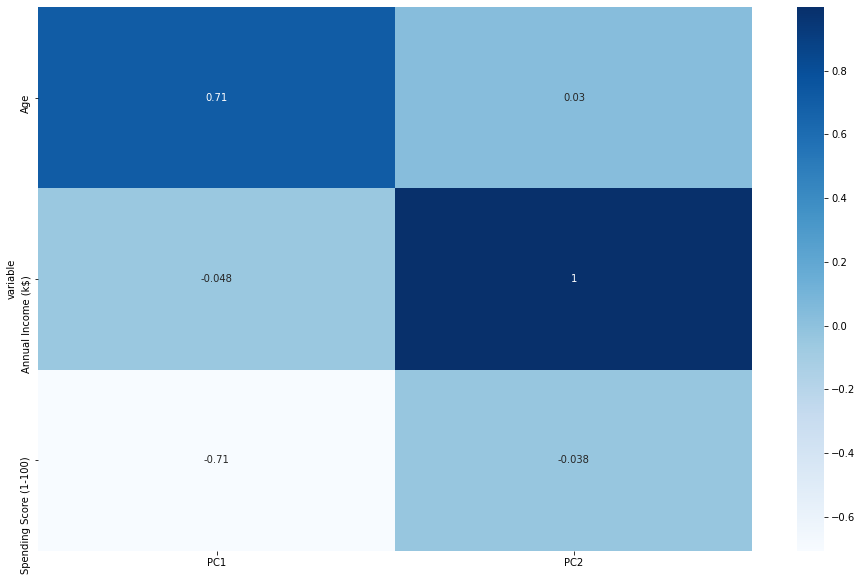

In [ ]:
# Analizamos la matriz de proyección para determinar el peso de las variables originales en cada componente principal
plt.figure(figsize=(16,10))
ax = sns.heatmap(loadings_df, annot=True, cmap='Blues')
plt.show()

# 1.4 Cálculo del nuevo espacio de características bi-dimensional

In [ ]:
sklearn_pca_scores_final = PCA(n_components=2).fit_transform(estandarizar)
sklearn_pca_scores_final

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [ ]:
num_pc = sklearn_pca_scores_final.shape[1]
pc_list_final = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pca_final = pd.DataFrame(sklearn_pca_scores_final,columns=pc_list_final)
pca_final

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


# 2. Entrenar el clustering K-Means

In [ ]:
X = pca_final.values

# 2.1 Método del codo para averiguar el número óptimo de clusters

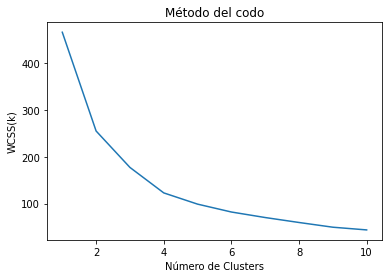

In [ ]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

Por lo que se visualiza en el gráfico de codos nos quedamos con clúster igual a 4.

# 2.2 Método de k-means para segmentar el dataset

In [ ]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

# 3. Encontrar los clusters (predict)

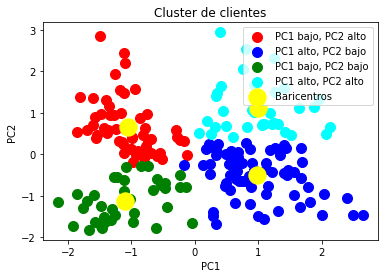

In [ ]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = "PC1 bajo, PC2 alto")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue", label = "PC1 alto, PC2 bajo")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green", label = "PC1 bajo, PC2 bajo")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "cyan", label = "PC1 alto, PC2 alto")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de clientes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# 4. Visualización de características de los clusters

In [ ]:
df_final = pd.concat([df,pd.DataFrame(y_kmeans,columns=['cluster'])],axis=1)
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

In [ ]:
X_mean = pd.concat([pd.DataFrame(df_final.mean().drop('cluster'), columns=['mean']), 
                   df_final.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)

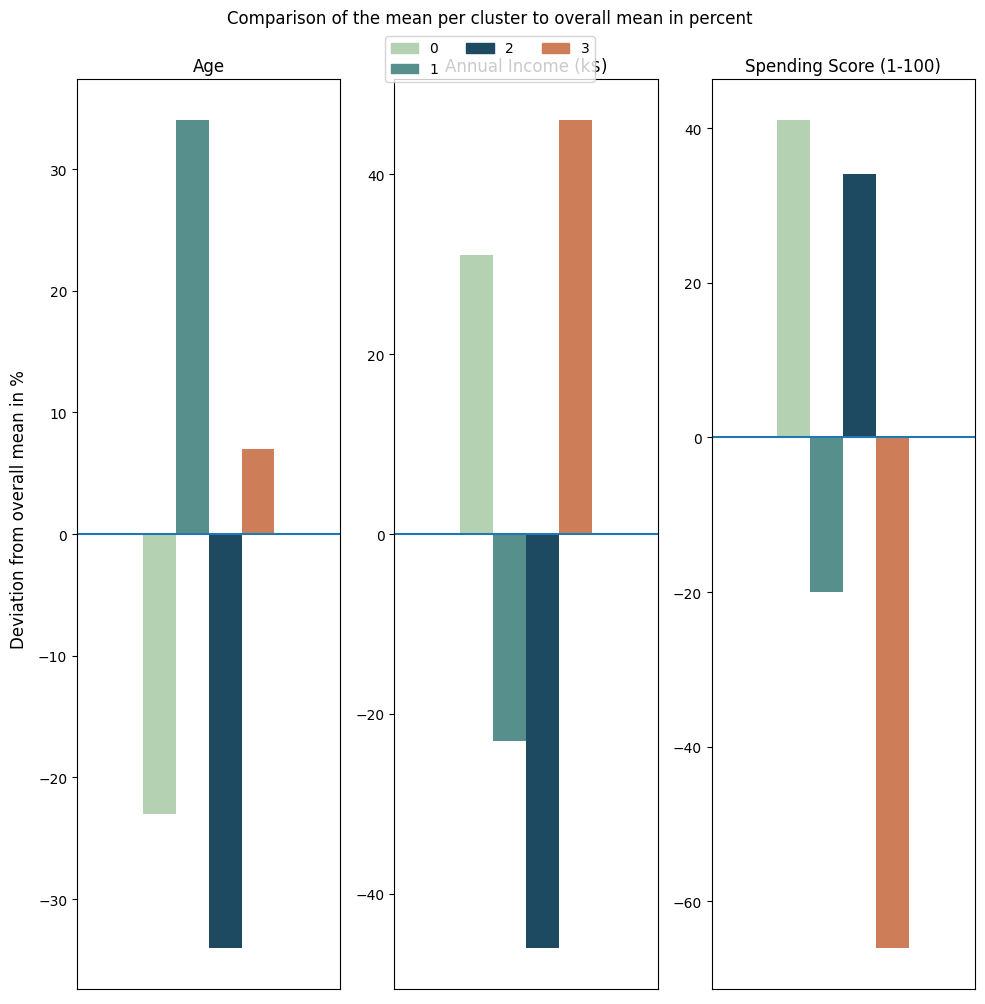

In [ ]:
import matplotlib.patches as mpatches
def cluster_comparison_bar(X_comparison, colors, deviation=True ,title="Cluster results"):
    
    features = X_comparison.index
    ncols = 3
    # calculate number of rows
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    # set figure size
    fig = plt.figure(figsize=(10,10), dpi=100)
    #interate through every feature
    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison[X_comparison.index==feature].plot(kind='bar', ax=ax, title=feature, 
                                                             color=colors[0:df_final.cluster.nunique()],
                                                             legend=False
                                                            )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = X_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:df_final.cluster.nunique()],
                                                                  X_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()
    
    fig.suptitle(title, fontsize=12, y=1)
    #fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
cluster_comparison_bar(X_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")

# 5 Ejercicio: "Perfilamiento"

- Realizar una segmentación de 5 clusters y las 3 variables utilizadas anteriormente
- Realizar una visualización de características por cluster
- Asignar un nombre o perfil a cada cluster